In [31]:
#import the dataset

In [1]:
import pandas as pd
df = pd.read_csv('Harley_Dataset.csv')

In [2]:
df.head()

,Order Number,Product Name,Quantity,Price,Payment Mode,Store Name,City,Country,Year,Month,Order Date
0,101071,Harley-Davidson Street 750,30,7000,NetBanking,RIDGES HARLEY-DAVIDSON,NYC,USA,2001,2,24-Feb-2001
1,101072,Harley-Davidson Street 750,34,7000,Cash,SEVEN ISLANDS HARLEY-DAVIDSON,Reims,France,2001,5,7-May-2001
2,101073,Harley-Davidson Street 750,41,7000,Credit card,BANJARA HARLEY-DAVIDSON,Paris,France,2001,7,1-Jul-2001
3,101074,Harley-Davidson Street 750,45,7000,NetBanking,TUSKER HARLEY-DAVIDSON LAVELLE ROAD,Pasadena,USA,2001,8,25-Aug-2001
4,101075,Harley-Davidson Street 750,49,7000,NetBanking,CAPITAL HARLEY-DAVIDSON,San Francisco,USA,2001,10,10-Oct-2001


In [32]:
#drop unnecessary columns

In [3]:
df.drop(['Order Number', 'Store Name', 'Order Date'], axis=1, inplace=True)


In [33]:
#create dummy variables out of categorical columns

In [4]:
df = pd.get_dummies(df, columns=['Product Name', 'Payment Mode', 'City', 'Country'], drop_first=False, dtype=int)

In [34]:
#create target variable, Order_Profit, defined as number of bikes per order 'Quantity' x price per bike 'Price'

In [5]:
Order_Profit = df["Quantity"] * df["Price"]
df["Order_Profit"] = Order_Profit

In [35]:
#make sure all datatypes are acceptable

In [6]:
df.dtypes.unique()

array([dtype('int64'), dtype('int32')], dtype=object)

In [36]:
#drop 'Price' column, as it's already included in the target variable:

In [7]:
df = df.drop( ['Price'], axis=1)
df.head()

,Quantity,Year,Month,Product Name_Harley-Davidson 1200 Custom,Product Name_Harley-Davidson CVO Limited,Product Name_Harley-Davidson Fat Bob,Product Name_Harley-Davidson Fat Boy,Product Name_Harley-Davidson Forty-Eight,Product Name_Harley-Davidson Heritage Softail Classic,Product Name_Harley-Davidson Iron 883,...,Country_Japan,Country_Norway,Country_Philippines,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_UK,Country_USA,Order_Profit
0,30,2001,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,210000
1,34,2001,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,238000
2,41,2001,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,287000
3,45,2001,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,315000
4,49,2001,10,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,343000


In [37]:
#Check for nulls one last time before modeling:

In [8]:
df.isna().any().sum()

0

In [38]:
#Standardize and fit data

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
 
 
# Initialise the Scaler
scaler = StandardScaler()
 
# To scale data
scaler.fit(df)

StandardScaler()

In [39]:
#assign dependent and independent variables:

In [10]:
>>> import pandas as pd
>>> from sklearn.model_selection import train_test_split
>>> from sklearn.datasets import load_iris

y = df.Order_Profit
X = df.drop('Order_Profit', axis = 1)

In [40]:
#subdivide data into training and test tests

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.head()

,Quantity,Year,Month,Product Name_Harley-Davidson 1200 Custom,Product Name_Harley-Davidson CVO Limited,Product Name_Harley-Davidson Fat Bob,Product Name_Harley-Davidson Fat Boy,Product Name_Harley-Davidson Forty-Eight,Product Name_Harley-Davidson Heritage Softail Classic,Product Name_Harley-Davidson Iron 883,...,Country_Italy,Country_Japan,Country_Norway,Country_Philippines,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_UK,Country_USA
2275,24,2015,5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1752,48,2015,5,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1336,45,2011,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
943,46,2010,4,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
147,32,2004,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model 1: Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

model score on training data: 0.9994334337672351
model score on testing data: 0.9969159102497841


In [13]:
importances = model.feature_importances_


# Random Forest Importance Features: Quantity, Year, Month

In [15]:
importance_features = pd.Series(model.feature_importances_, index=X.columns)
print((importance_features.iloc[0:3]*100))

Quantity    21.777491
Year         0.088352
Month        0.052178
dtype: float64


# Random Forest Importance Features, Grouped by Motorcycle Name

In [16]:
print((importance_features.iloc[3:18]*100).sort_values(ascending = False))

Product Name_Harley-Davidson Fat Bob                     36.167706
Product Name_Harley-Davidson Street Bob                  36.008890
Product Name_Harley-Davidson Street 750                   2.272403
Product Name_Harley-Davidson 1200 Custom                  1.446147
Product Name_Harley-Davidson Iron 883                     0.566166
Product Name_Harley-Davidson CVO Limited                  0.454887
Product Name_Harley-Davidson Fat Boy                      0.453743
Product Name_Harley-Davidson Road King                    0.175383
Product Name_Harley-Davidson Forty-Eight                  0.098695
Product Name_Harley-Davidson Heritage Softail Classic     0.097737
Product Name_Harley-Davidson Street Rod                   0.088259
Product Name_Harley-Davidson Roadster                     0.004176
Product Name_Harley-Davidson Softail Deluxe               0.000972
Product Name_Harley-Davidson Softail Low Rider            0.000231
Product Name_Harley-Davidson Street Glide Special         0.00

# Random Forest Importance Features, Grouped by Payment Method

In [17]:
print((importance_features.iloc[18:22]*100).sort_values(ascending = False))

Payment Mode_Loan           0.024749
Payment Mode_NetBanking     0.010298
Payment Mode_Cash           0.007181
Payment Mode_Credit card    0.003085
dtype: float64


# Random Forest Importance Features, Grouped by Cities

In [18]:
print((importance_features[22:82]*100).sort_values(ascending = False))
print((importance_features[82:95]*100).sort_values(ascending = False))


City_Kobenhavn        5.759412e-02
City_Liverpool        7.546383e-03
City_Madrid           4.754230e-03
City_Salzburg         2.614386e-03
City_Newark           2.354705e-03
City_Manchester       1.844089e-03
City_Chatswood        1.840726e-03
City_Melbourne        1.687951e-03
City_San Francisco    1.391236e-03
City_Lyon             9.371379e-04
City_Las Vegas        9.333400e-04
City_Bruxelles        8.107401e-04
City_Glen Waverly     7.227983e-04
City_Paris            6.296185e-04
City_Minato-ku        5.988972e-04
City_New Bedford      5.826871e-04
City_Boras            3.791586e-04
City_Philadelphia     3.718277e-04
City_Koln             2.846855e-04
City_Gensve           2.846656e-04
City_Helsinki         2.498051e-04
City_Reggio Emilia    2.284275e-04
City_Nantes           2.205008e-04
City_NYC              2.095734e-04
City_Bergen           1.935949e-04
City_Marseille        1.459823e-04
City_Boston           1.457243e-04
City_Frankfurt        1.388892e-04
City_Barcelona      

# Random Forest Importance Features, Grouped by Country

In [19]:
print((importance_features[95:]*100).sort_values(ascending = False))

Country_Denmark        5.639925e-02
Country_USA            7.021374e-03
Country_France         6.915715e-03
Country_UK             3.938823e-03
Country_Australia      2.258856e-03
Country_Belgium        1.921008e-03
Country_Spain          1.783516e-03
Country_Austria        1.247970e-03
Country_Italy          8.648756e-04
Country_Germany        4.075540e-04
Country_Switzerland    3.792766e-04
Country_Norway         2.765345e-04
Country_Japan          2.047946e-04
Country_Finland        2.004389e-04
Country_Singapore      1.766975e-04
Country_Philippines    1.228352e-04
Country_Sweden         3.776457e-05
Country_Canada         1.209469e-05
Country_Ireland        6.546387e-07
dtype: float64


# Random Forest Visual

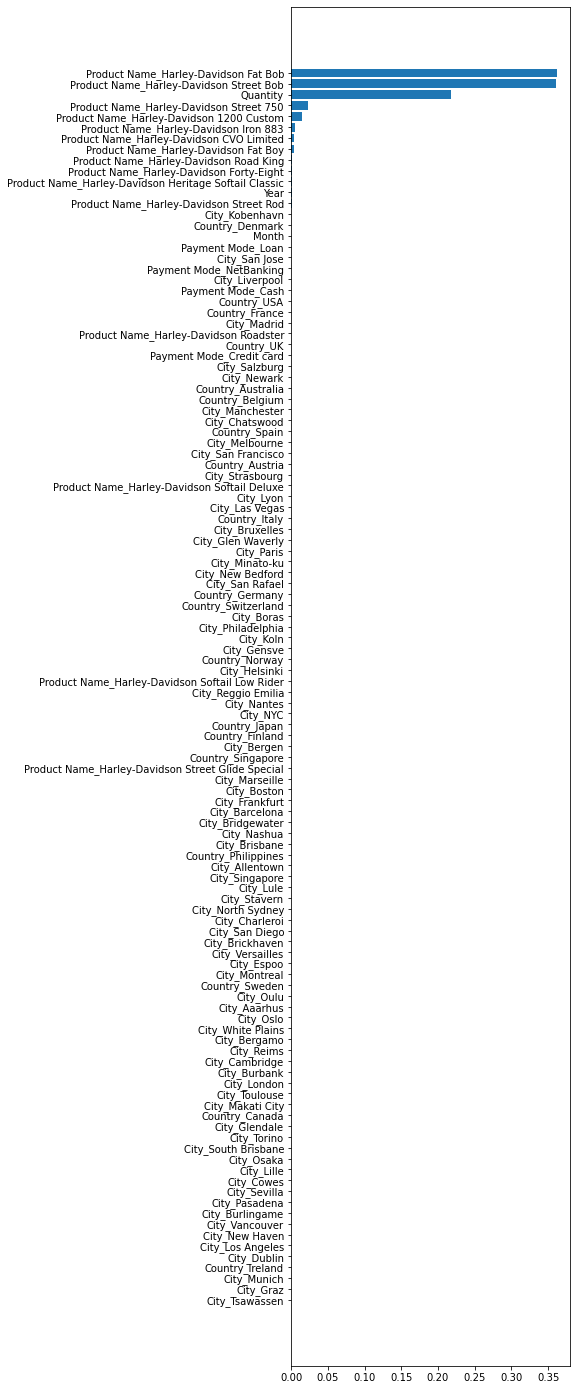

In [22]:
import numpy as np
import matplotlib.pyplot as plt
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize = (5,25))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

# Model 2: LASSO Regression


In [23]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

model = make_pipeline(StandardScaler(), Lasso(alpha=.015))

model.fit(X_train, y_train)

print(f'model score on training data: {model.score(X_train, y_train)}')
print(f'model score on testing data: {model.score(X_test, y_test)}')

model score on training data: 0.9521907293801792
model score on testing data: 0.9403654659376772


C:\Users\aedge\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1265312888489.5957, tolerance: 20359259774.46692
  model = cd_fast.enet_coordinate_descent(


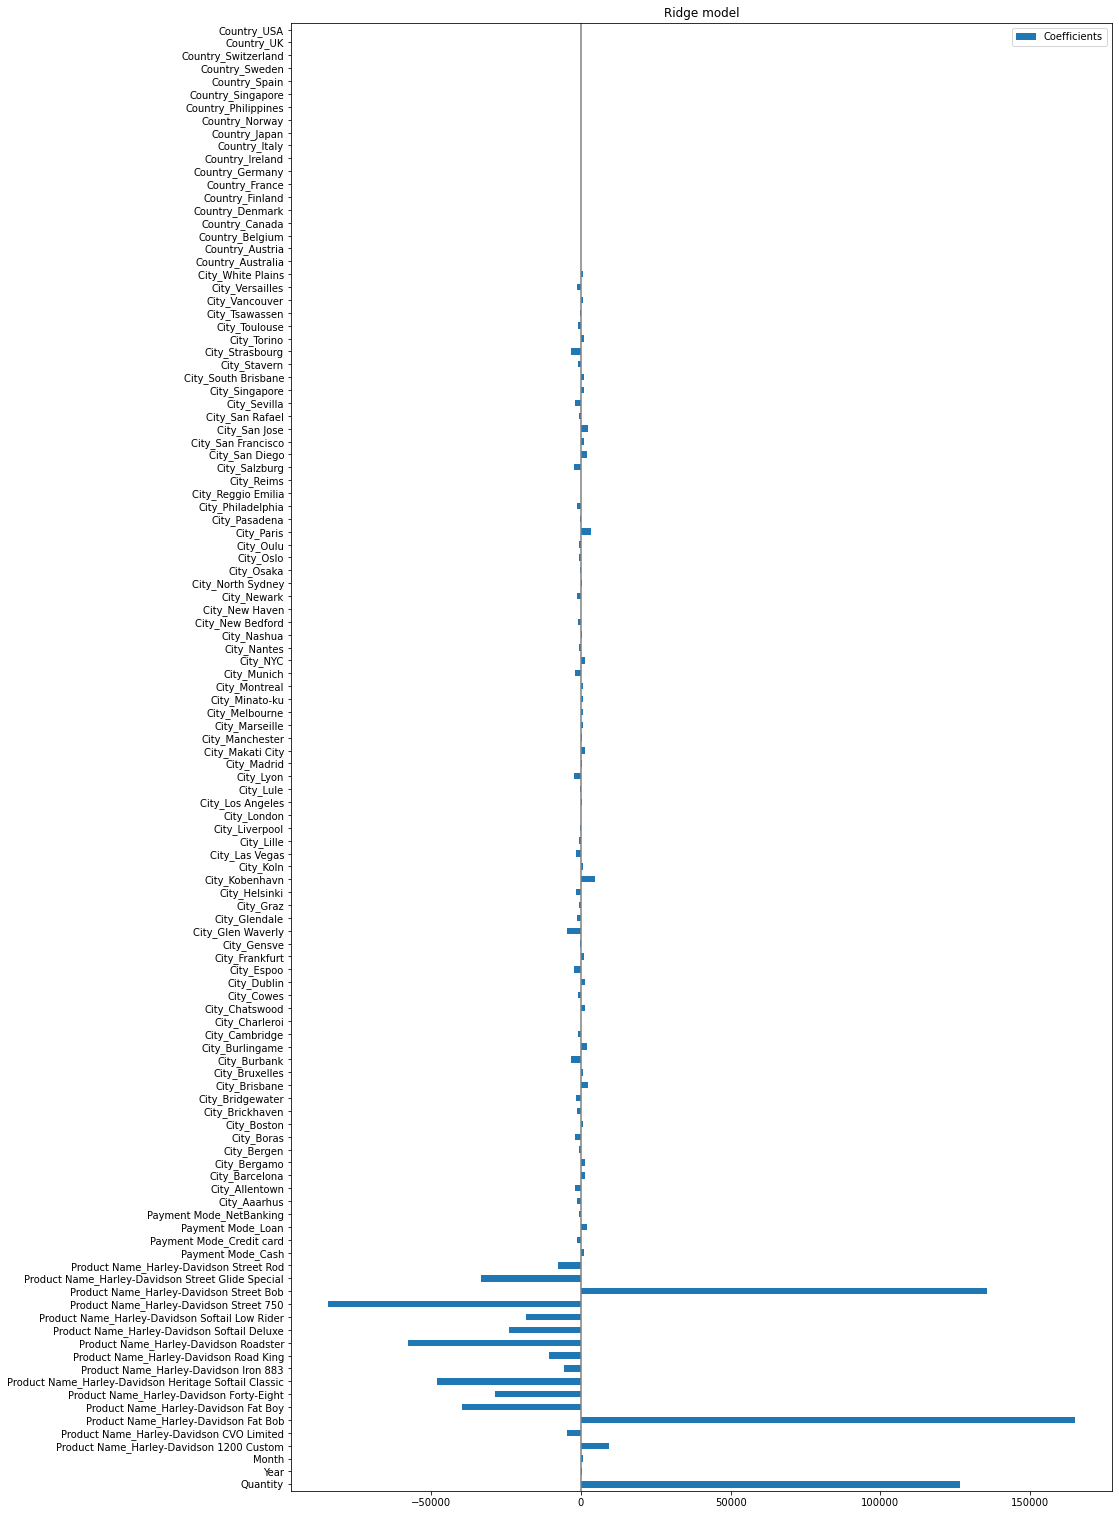

In [24]:
coefs = pd.DataFrame(
   model[1].coef_,
   columns=['Coefficients'], index=X_train.columns
)

coefs.plot(kind='barh', figsize=(19, 27))
plt.title('Ridge model')
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)



# Model 3: Ordinary Least Squares Regression


In [25]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Order_Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     566.2
Date:                Sat, 02 Jul 2022   Prob (F-statistic):               0.00
Time:                        15:19:22   Log-Likelihood:                -35394.
No. Observations:                2823   AIC:                         7.097e+04
Df Residuals:                    2730   BIC:                         7.153e+04
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

# Analysis of Results: Random Forest
## Model score: 99.69%

#### Using feature importance, Random Forest showed that the Street Bob, Fat Bob, Street 750, 1200 Custom, Iron 883, Fat Boy, and CVO Limited are the most important makes of motorcycles; Quantity represents a significant proportion as well.
#### Kobenhaven, San Jose, Liverpool, Madrid, Salzburg, Newark, Manchester, Chatswood, Melbourne, San Francisco, Strasbourg, Lyon, Las Vegas, Bruxelles, Glen Waverly, Paris, Minato-ku, New Bedford, Boras, Philadelphia, San Rafael, Koln, Gensve, Helsinki and Reggio Emilia  represent the top 25 cities of feature importance via Random Forest.
#### The countries of Denmark, USA, France, United Kingdom, Australia, Belgium, Spain, Austria, Italy and Germany share the highest proportion of importance using Random Forest.


# Analysis of Results: LASSO Regression

## Model Score: 94.04%
#### Barcelona, Bergamo, Boston, Brisbane, Bruxelles, Burlingame, Chatswood, Dublin, Frankfurt, Kobenhavn, Koln, Makati City, Marseille, Melbourne, Minato-ku, Montreal, New York City, Paris, San Diego, San Francisco, San Jose, Singapore, South Brisbane, Torino, Vancouver, and White Plains are the cities containing positive LASSO coefficients
#### Loans and cash were the only positive coefficients from payment methods
#### Street Bob, Fat Bob, and 1200 Custom were the only motorcycles with positive coefficents; Quantity is a very high coefficient, and Month is a small positive coefficient.

# Analysis of Results: OLS Regression

## Below is a list of features containing positive OLS coefficients
#### Quantity, Year, Month
#### Motorcycles: 1200 Custom, Fat Bob and Street Bob
#### Cities: Barcelona, Bergamo, Bergen, Boston, Brisbane, Bruxelles, Burlingame, Chatswood, Dublin, Frankfurt,Helsinki, Kobenhavn, Koln,Lule, Madrid, Manchester, Marseille, Melbourne,Minato-Ku, Montreal, NYC,Nashua, New Haven, North Sydney,Oslo, Oulu, Paris, Reims,San Diego, San Francisco, San Jose, Ran Rafael, Singapore, South Brisbane, Torino, Vancouver, and White Plains
#### Countries: Denmark, Ireland and Singapore

#### With an r-squared score of 0.95, 95% of dependent variable's variance is explained by the independent variables

# Pros & Cons of each Model:
### Random Forest
#### Pros: Easily interpretable importance features, highest scoring of the three models
#### Cons: Slowest runtime of the three models

### LASSO Regression
#### Pros: Insightful and easy understanding of importance features
#### Cons: Slow runtime

### OLS Regression
#### Pros: Insightful and abundant elaboration of feature importance
#### Cons: For a new Data Scientist, an OLS Regression analysis might be a bit overwhelming in regards to interpretability




### From these three models and their respective feature importance methods, there are notable overlaps among them:
#### Quantity, or, number of motorcycles per shipment
#### Motorcycle Series: Street Bob, Fat Bob, 1200 Custom
#### Cities: Kobenhavn, Bruxelles, San Jose, Melbourne, Madrid, New York City, Boston, Barcelona, Marseille



# Optimal Model Choice
#### After having successfully run all three models, the Random Forest is the best model from this report. In addition to a fantastic prediction score, it provides easily interpretable importance features; however, the proportions of the importance features are largely skewed towards just a handful of features. To take into account this imbalance, the best model would be a combination of the Random Forest with the LASSO Regression, as the LASSO regression importance features include a broader inclusion of features.

# Client Recommendations
#### Based on the findings above, I recommend that you continue focusing on the best number of quantity per shipment, as this has proven vital to the profits earned per shipment.
#### Continue regularly producing the Street Bob, Fat Bob, and 1200 Custom. Their notable feature importance from all 3 tests indicates their value in the Harley Davidson industry.

#### The 9 cities from the previous feature importance come from 6 countries; specifically we have the following:
#### Kobnhavn, Denmark; Bruxelles, Belgium; San Jose, New York City and Boston, USA; Madrid and Barcelona, Spain; Melbourne, Australia; and Marseille, France

#### These are your most valuable customers. Continue shipping to them and regularly maintaining business relations with them.

#### Emphasize sales in November and December. These 2 months alone account for nearly 25% of profits.
